In [1]:
import numpy as np
import pandas as pd
import joblib
import warnings
import collections
from itertools import zip_longest
import os

from scipy.optimize import curve_fit
import GPy
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

from utils import cl_curve_smooth, curve_derivative

In [2]:
test_01 = joblib.load('./test_HA/test_HA_01.lz4')
test_02 = joblib.load('./test_HA/test_HA_02.lz4')
test_03 = joblib.load('./test_HA/test_HA_03.lz4')
test_04 = joblib.load('./test_HA/test_HA_04.lz4')
test_05 = joblib.load('./test_HA/test_HA_05.lz4')

train_01 = joblib.load('./train_HA/train_HA_01.lz4')
train_02 = joblib.load('./train_HA/train_HA_02.lz4')
train_03 = joblib.load('./train_HA/train_HA_03.lz4')

### 计算变化范围

In [3]:
def CL_percent_delta_initial(df, apply_col, seg_col, up_box=90, down_box=10, up_thred=10, down_thred=0, show_anomaly = False):
    '''
    描述：
        初始化统计量 每一段时间的某一列变化范围(delta)，
        注意：如果需要进一步使用cl_curve_smooth函数平滑曲线的话， show_anomaly应该设置为False
    '''
    data = df[apply_col]
    seg_cl = df[seg_col].unique()
    seg_cl.sort()
    
    # 初始化delta_list
    delta_list = []
    for cl in seg_cl:
        tmp = data[df[seg_col] == cl]
        up_bound = np.percentile(tmp, up_box)
        down_bound = np.percentile(tmp, down_box)
        cl_delta = up_bound - down_bound
        delta_list.append(cl_delta)
    if show_anomaly:
        for i in range(len(delta_list)):
            idx_delta = delta_list[i]
            if (idx_delta>up_thred) or (idx_delta<down_thred):
                delta_list[i] = -1

    return seg_cl, delta_list



## 求delta

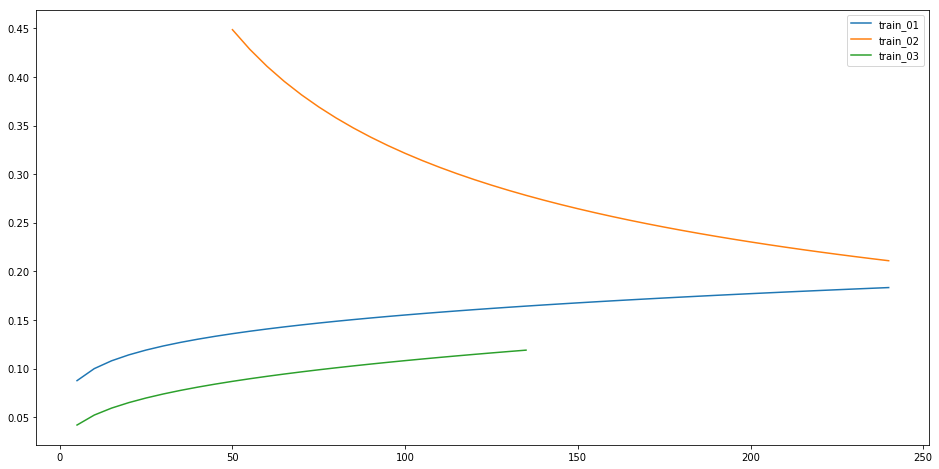

In [4]:
# 'numpy_poly_fit'
# CLI
plt.figure(figsize=(16,8))
cl, delta_list = CL_percent_delta_initial(train_01, 'PCA_T2', 'CLI', up_box=85, down_box=15, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=5, center=False, min_periods=1).mean().tolist()
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='train_01')

# CLI>45
cl, delta_list = CL_percent_delta_initial(train_02[train_02['CLI']>45], 'PCA_T2', 'CLI', up_box=85, down_box=15, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=5, center=False, min_periods=1).mean().tolist()
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='train_02')

# CLI<140
cl, delta_list = CL_percent_delta_initial(train_03[train_03['CLI']<140], 'PCA_T2', 'CLI', up_box=85, down_box=15, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=5, center=False, min_periods=1).mean().tolist()
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='train_03')

plt.legend()

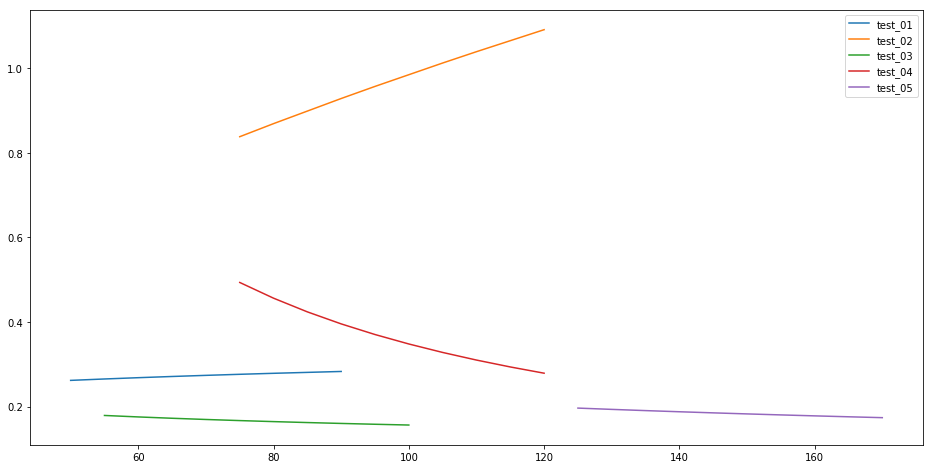

In [5]:
plt.figure(figsize=(16,8))
cl, delta_list = CL_percent_delta_initial(test_01, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='test_01')

cl, delta_list = CL_percent_delta_initial(test_02, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='test_02')

cl, delta_list = CL_percent_delta_initial(test_03, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='test_03')

cl, delta_list = CL_percent_delta_initial(test_04, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='test_04')

cl, delta_list = CL_percent_delta_initial(test_05, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
delta_list = pd.Series(delta_list).rolling(window=4, center=False, min_periods=1).mean().tolist()
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit')
plt.plot(cl, delta_list, label='test_05')
plt.legend()

## 求delta的1阶导数

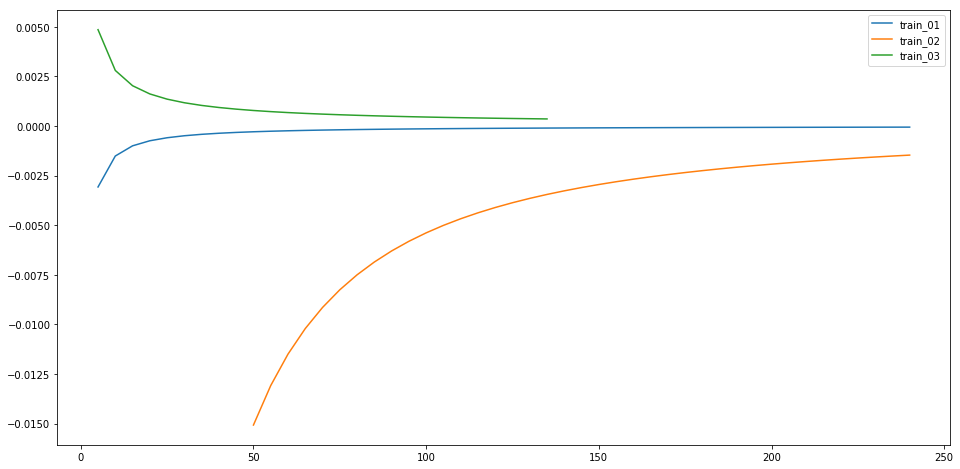

In [6]:
plt.figure(figsize=(16,8))
cl, delta_list = CL_percent_delta_initial(train_01, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='train_01')

cl, delta_list = CL_percent_delta_initial(train_02[train_02['CLI']>45], 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='train_02')

cl, delta_list = CL_percent_delta_initial(train_03[train_03['CLI']<140], 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='train_03')
plt.legend()

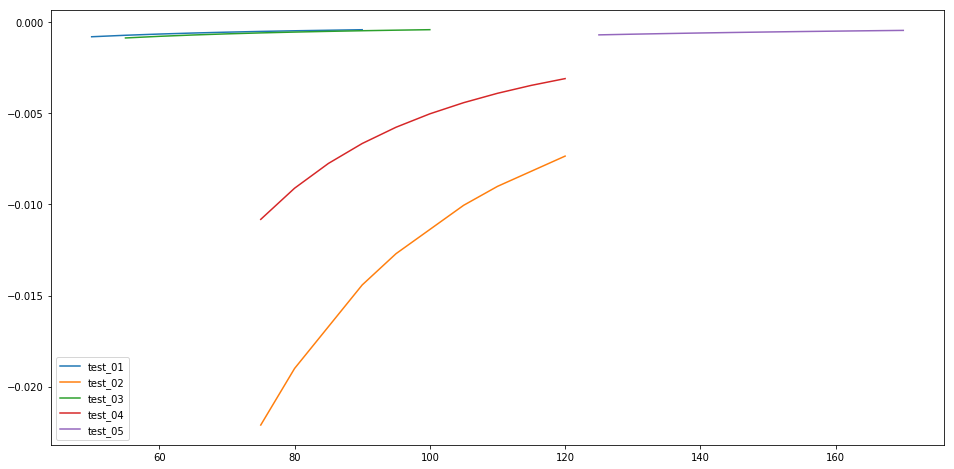

In [7]:
plt.figure(figsize=(16,8))
cl, delta_list = CL_percent_delta_initial(test_01, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='test_01')

cl, delta_list = CL_percent_delta_initial(test_02, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='test_02')

cl, delta_list = CL_percent_delta_initial(test_03, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='test_03')

cl, delta_list = CL_percent_delta_initial(test_04, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl, 1)
plt.plot(cl, diff_list, label='test_04')

cl, delta_list = CL_percent_delta_initial(test_05, 'PCA_T2', 'CLI', up_box=95, down_box=5, show_anomaly=False)
cl, delta_list, _ = cl_curve_smooth(delta_list, cl, up_thred=30, down_thred=0, confidence=0.5, fit_type='moving_robust_avg')
cl, delta_list, fit_func_dict = cl_curve_smooth(delta_list, cl, up_thred=10, down_thred=0, confidence=0.0, fit_type='scipy_curve_fit', return_cureve_func=True)
diff_list = curve_derivative(fit_func_dict, cl,1)
plt.plot(cl, diff_list, label='test_05')
plt.legend()